# Eric Karsten PSET 1 Solutions

## 1. 1D KDE Using Simulated Coronavirus Data

### (a) Create three histograms of incubation period. One for all of the data and then one for individuals of age < 40 and one for individuals of age > 40. Use 15 bins.

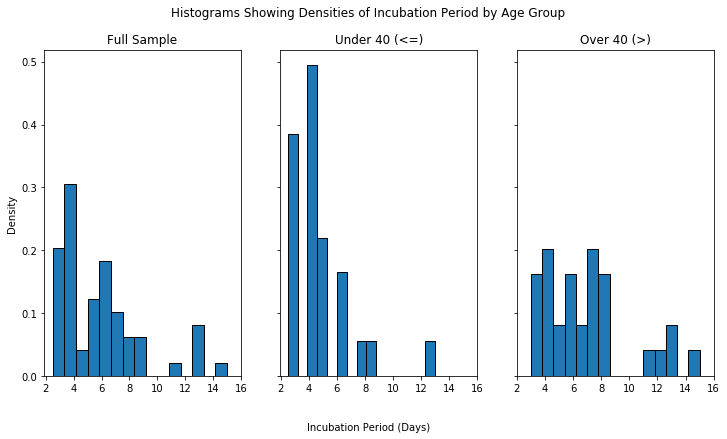

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.neighbors import KernelDensity
%matplotlib inline

covid = pd.read_csv('data/COVIDIncubation.txt')

full = np.array(covid.symp_days)
under40 = np.array(covid.symp_days[covid.age <= 40])
over40 = np.array(covid.symp_days[covid.age > 40])

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 6))

fig.text(0.5, 0, 'Incubation Period (Days)', ha='center')
fig.suptitle("Histograms Showing Densities of Incubation Period by Age Group")

ax[0].hist(full, bins=15, density=True, edgecolor='black');
ax[0].set_title('Full Sample');
ax[0].set_ylabel('Density');
ax[0].set_xticks(np.arange(2,18, 2));

ax[1].hist(under40, bins=15, density=True, edgecolor='black');
ax[1].set_title('Under 40 (<=)');
ax[1].set_xticks(np.arange(2, 18, 2));

ax[2].hist(over40, bins=15, density=True, edgecolor='black');
ax[2].set_title('Over 40 (>)');
ax[2].set_xticks(np.arange(2, 18, 2));


### (b) Fit a Gaussian KDE to each histogram. Use LOOCV to choose optimal bandwidth. Plot all distributions on one plot with a clear legend.

Best BandWidth for Full:  0.8910453324821516
Best BandWidth for Under 40:  1.6233824316122782
Best BandWidth for Over 40:  1.1861737164524786


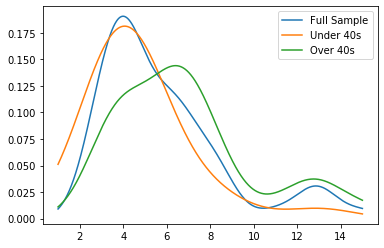

In [89]:
# Initiate space of bandwidths and space to plot density
bandwidths = 10 ** np.linspace(-1, 1, 500)
x_d = np.linspace(1, 15, 1000)

# fit kde on Full sample
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(full[:, None]);
print("Best BandWidth for Full: ", grid.best_params_['bandwidth'])
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(full[:, None])
logprob_full = kde.score_samples(x_d[:, None])

# fit kde on under 40's
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(under40[:, None]);
print("Best BandWidth for Under 40: ", grid.best_params_['bandwidth'])
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(under40[:, None])
logprob_under = kde.score_samples(x_d[:, None])

# fit kde on over 40's
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(over40[:, None]);
print("Best BandWidth for Over 40: ", grid.best_params_['bandwidth'])
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(over40[:, None])
logprob_over = kde.score_samples(x_d[:, None])

plt.plot(x_d, np.exp(logprob_full), label = "Full Sample");
plt.plot(x_d, np.exp(logprob_under), label = "Under 40s");
plt.plot(x_d, np.exp(logprob_over), label = "Over 40s");
plt.legend(loc='best');

### (c) What does this tell you about COVID-19 incubation periods of young versus old individuals?

Looking at the figure above, we see that the distribution for older individuals is shifted to the right from that of younger individuals. This suggests that the incubation period might be systematically longer for older individuals. A public health policy implication of this is that the quarrantine period for yonger individuals should be 7 days while the incubation period for older individuals should perhaps be 14 days.

## 2. 2D KDE Using Bequest Data

### (a) Read in the data as a NumPy array. Plot the 2D empirical histogram with age on the x axis, income group on the y axis, and density on the Z axis using a 3D surface plot tool. Present the histogram from a clear angle.

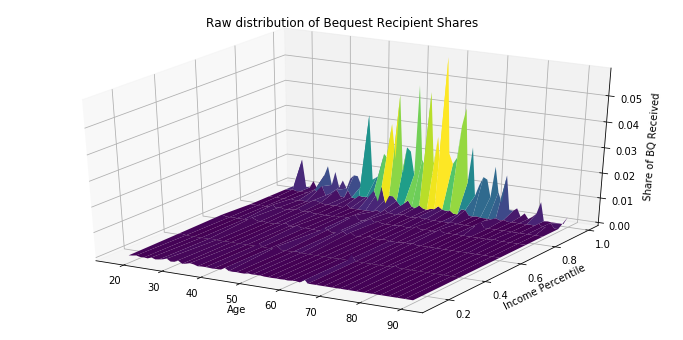

In [112]:
from mpl_toolkits import mplot3d

bq_probs = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure(figsize=(12, 6));
ax = fig.gca(projection='3d');
ax.plot_surface(age_mat, income_mat, bq_probs, edgecolor='none', cmap='viridis');
ax.set_title('Raw distribution of Bequest Recipient Shares');
ax.set_xlabel('Age');
ax.set_ylabel('Income Percentile');
ax.set_zlabel('Share of BQ Received');


### (b) Fit a bivariate kernel density estimator to the data. Use a gaussian kernel. Chose a bandwidth parameter that you think is best. Justify the parameter choice. Plot the chosen surface. What is the estimated density for bequest recipients who are age 61 in the 6th lifetime income category. 

The predicted density for bequest recipeinets who are age 61 and in the 6th income category is:  0.02953


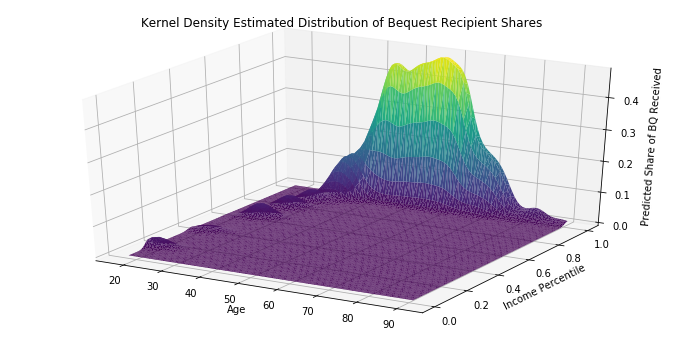

In [144]:
from scipy.stats import gaussian_kde
from itertools import product

bq_obs = pd.read_csv('data/BQ_ind_data.txt')
x_grid = np.array(list(product(np.linspace(18, 91, 100), np.linspace(0, 1, 100))))

my_kde = gaussian_kde(np.array(bq_obs).T, bw_method = .2)
plotting_probs = my_kde.evaluate(x_grid.T)

fig = plt.figure(figsize=(12, 6));
ax = fig.gca(projection='3d');
ax.plot_trisurf(x_grid[:,0], x_grid[:,1], plotting_probs, edgecolor='none', cmap='viridis');
ax.set_title('Kernel Density Estimated Distribution of Bequest Recipient Shares');
ax.set_xlabel('Age');
ax.set_ylabel('Income Percentile');
ax.set_zlabel('Predicted Share of BQ Received');


print("The predicted density for bequest recipeinets who are age 61 and in the 6th income category is: ",
     round(my_kde.evaluate(np.array([61, 0.94]).T)[0], 5))

I chose .2 as my bandwith parameter because it had a nice balance of capturing the shape of the distribution without completely overfitting the sampled data. I found that when I tried higher parameters the distribution I got was over-smoothed and lost some of the relevant detail with the bequests to 18 year olds across the income spectrum. On the other hand when I tried lower smoothing bandwidths it was implausibly jagged and overfit, so I settled on the above version of the figure.